# 标准化
我们需要对原始数据进行处理，进行Standardization（或者叫Z-score Normalization）

要求：均值$\mu=0$和标准差$\sigma=1$

转换公式如下：
$$
z = \frac{x-\mu}{\sigma}
$$

# 归一化
另一种方法叫做Min-Max Scaling（或者叫做Normalization，也就是常说的0-1归一化）
处理后的所有特征的值都会被压缩到0到1区间上，这样做还可以抑制离群值对结果的影响


转换公式如下：
$$
X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}}
$$

# 案例

## 1. 读取数据

In [31]:
import pandas as pd

# 只需要这些features
features = ['accommodates','minimum_nights']
# 读取数据
df = pd.read_csv('listings.csv')[features]

print(df.shape)
df.head()

(3723, 2)


,accommodates,minimum_nights
0,4,1
1,6,2
2,1,2
3,2,1
4,4,7


## 2. 标准化 & 归一化

In [34]:
from sklearn import preprocessing, impute

# Standardization
std_scale = preprocessing.StandardScaler().fit(df[['accommodates','minimum_nights']])
df_std = std_scale.transform(df[['accommodates','minimum_nights']])

# Normalization
minmax_scale = preprocessing.MinMaxScaler().fit(df[['accommodates','minimum_nights']])
df_minmax = minmax_scale.transform(df[['accommodates','minimum_nights']])

## 3. 打印标准化后均值和标准差值

In [35]:
print('Mean after standardization:\nAccommodates={:.2f} Minimum Nights={:.2f}'
     .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAccommodates={:.2f} Minimum Nights={:.2f}'
     .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Accommodates=0.00 Minimum Nights=0.00

Standard deviation after standardization:
Accommodates=1.00 Minimum Nights=1.00


## 4. 画对比图

In [30]:
%matplotlib inline

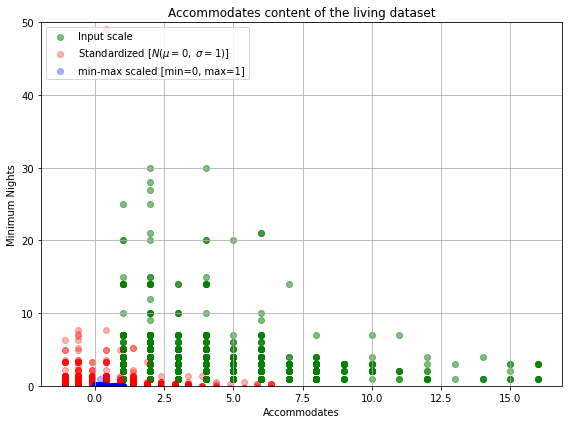

In [43]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))
    
    plt.scatter(df['accommodates'],df['minimum_nights'],color='green',
                label='Input scale',alpha=0.5)
    
    plt.scatter(df_std[:,0], df_std[:,1],color='red',
                label='Standardized [$N (\mu=0, \; \sigma=1)$]',alpha=0.3)
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1], color='blue',
                label='min-max scaled [min=0, max=1]',alpha=0.3)
    
    plt.title('Accommodates content of the living dataset')
    plt.xlabel('Accommodates')
    plt.ylabel('Minimum Nights')
    plt.ylim(0,50)
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()
    
plot()